In [1]:
from matplotlib import pyplot as plt
from numpy.random import randn
import random
%matplotlib inline
import numpy as np
from skimage import color

import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

Number of points

In [2]:
size = 400

Number of Gaussians to use

In [3]:
number_of_gaussians = 2

Interval to use

In [4]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
variance_min, variance_max = 2, 30

In [5]:
lower_border, upper_border = 0., 1.

Color-Maps to use

In [6]:
brewer_color_maps =["blue", "green", "orange"]

Matplotlib

In [7]:
def generate_gaussian(verbose=False):
    X, Y, Z = helper.get_random_gaussian(x_min,x_max,y_min,y_max,variance_min, variance_max,size,0.6)
    return Z

In [8]:
def generate_brewer_color_grid(Z,colorscheme ,x_min, x_max, verbose=False):
    return picture_worker.get_colorgrid(Z,color_schemes.create_color_brewer_colorscheme,10,min_value = x_min, max_value = x_max,colorscheme=colorscheme, verbose=verbose)


In [9]:
z_list = []
for i in brewer_color_maps:
    z_list.append(generate_gaussian(verbose=  False))

In [10]:
z_sum = z_list[0].copy()
z_min, z_max = np.min(z_list[0]), np.max(z_list[1])
for i in z_list[1:]:
    i_min = np.min(i)
    i_max = np.max(i)
    print("Min: {} vs {}".format(z_min, i_min))
    print("Max: {} vs {}".format(z_max, i_max))
    z_min = np.min([z_min,i_min])
    z_max = np.max([z_max,i_max])
    z_sum += i

Min: 2.1394321377455385e-05 vs 3.3304976980162332e-09
Max: 0.013697101546702334 vs 0.013697101546702334
Min: 3.3304976980162332e-09 vs 3.666610601789993e-06
Max: 0.013697101546702334 vs 0.006945997935477137


In [15]:
img_list_brewer = []

for z, colormap in zip(z_list, brewer_color_maps):
    z_min_weight = (upper_border-lower_border)*(np.min(z) - z_min) / (z_max - z_min)+lower_border
    z_max_weight = (upper_border-lower_border)*(np.max(z) - z_min) / (z_max - z_min)+lower_border
    img, _ = generate_brewer_color_grid(z, colormap, z_min_weight, z_max_weight, verbose=False)
    img_list_brewer.append(img)

In [16]:
mixed_matplotlib, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_brewer, z_list)

In [17]:
mixed_matplotlib = picture_worker.find_contour_lines(z_sum, mixed_matplotlib, 7)

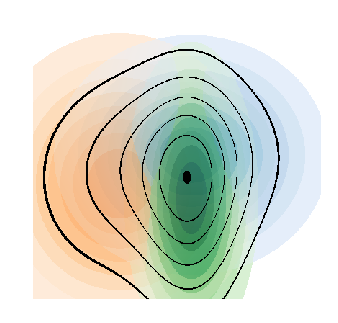

In [18]:
#displays an image
plt.imshow(mixed_matplotlib)
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.show()